In [5]:
#importing libraries for data cleanindg and pre-processing
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('spam.csv',encoding='ISO-8859–1') # loading data set 
df.head() # show first 5 records 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape
# shows no. of rows and columns in csv file

(5572, 5)

In [8]:
# 1. data cleaning
# 2. eda
# 3. text preprocessing 
# 4. model Building 
# 5. evaluation and risk score generation 
# 6. improvements 
# 7. deploy as a website 

## 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# removing columns which are not required for analysis
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [11]:
df.sample(5)

,v1,v2
3054,spam,EASTENDERS TV Quiz. What FLOWER does DOT compa...
3847,ham,Can you plz tell me the ans. BSLVYL sent via f...
4901,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
3226,ham,Wife.how she knew the time of murder exactly
461,ham,Great. Never been better. Each day gives even ...


In [12]:
# renaming the columns
df.rename(columns={'v1':'label','v2':'text'},inplace=True)
df.sample(5)

,label,text
4863,ham,Sorry da..today i wont come to play..i have dr...
5431,ham,If I was I wasn't paying attention
3564,ham,We know TAJ MAHAL as symbol of love. But the o...
2384,ham,"Sorry, I'll call later"
1594,ham,Never blame a day in ur life. Good days give u...


In [13]:
# importing sklearn for data processing 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
# transforming ham into 0 and spam into 1 for ease of processing
df['label'] = encoder.fit_transform(df['label'])

In [15]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# missing values
df.isnull().sum()

label    0
text     0
dtype: int64

In [17]:
# check for duplicate values
df.duplicated().sum()

403

In [18]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

# 2. EDA 

In [21]:
df['label'].value_counts() # count no. of ham and spam values

0    4516
1     653
Name: label, dtype: int64

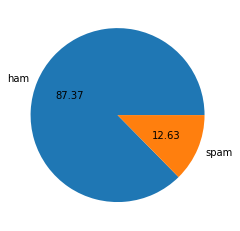

In [22]:
# for creating a pie chart 
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
# we can see from pie chart that data is unbalanced 

In [1]:
import nltk

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saumya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [25]:
#number of characters
df['num_char'] = df['text'].apply(len)

In [26]:
df.head()

,label,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,label,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
# number of sentences 
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,label,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_char','num_words','num_sentences']].describe() 

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# ham
df[df['label'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#spam
df[df['label'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [37]:
# importing seaborn for data visualisation
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

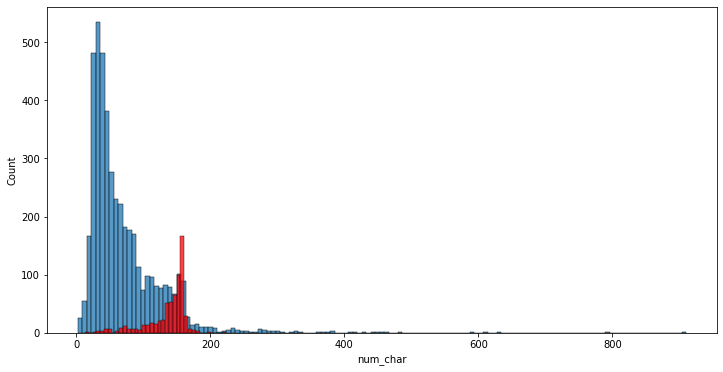

In [39]:
# histogram of 'num_char'
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_char'])
sns.histplot(df[df['label'] == 1]['num_char'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

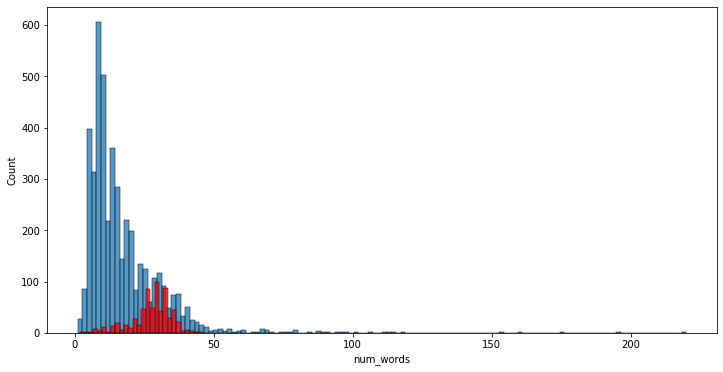

In [40]:
# histogram of 'num_words'
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

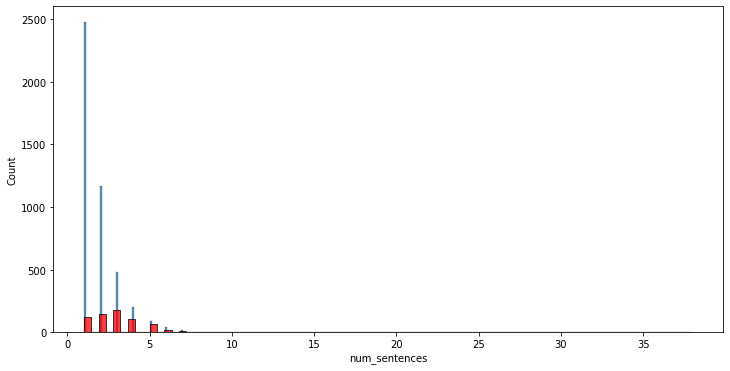

In [43]:
# histogram of 'num_sentences'
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_sentences'])
sns.histplot(df[df['label'] == 1]['num_sentences'],color='red')

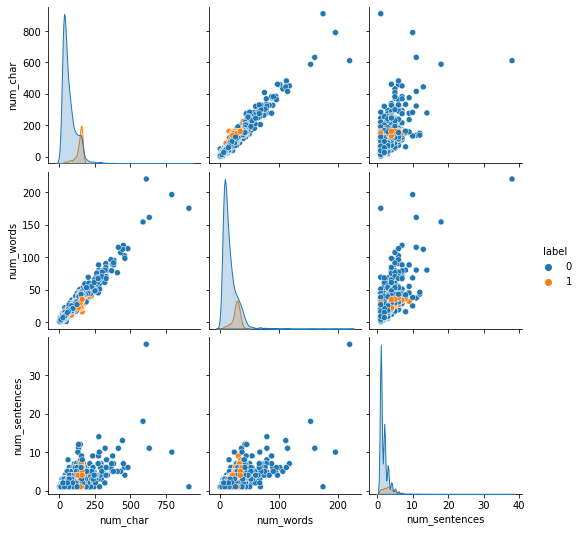

In [41]:
sns.pairplot(df,hue='label') 
#  to understand the best set of features to explain a relationship between two variables

<AxesSubplot:>

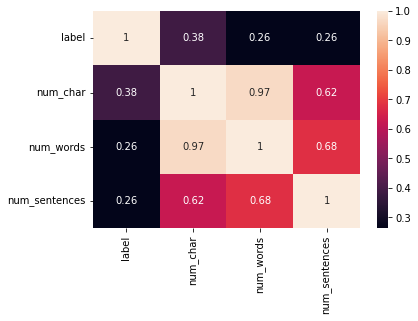

In [42]:
sns.heatmap(df.corr(),annot=True) # correlation matrix